# Chapter 14 - Probabilistical Reasoning Over Time

In this chapter, we will learn about probabilistic reasoning over time. We will learn about the Markov assumption, the hidden Markov model, and the Kalman filter.

## Introduction - Contents

- **Probabilistic Models:**  Introduction to models that handle uncertainty over time. 
- **Temporal Evolution:**  How the state of the world changes over time and how to model these changes. 
- **Key Challenges:**  Dealing with the dynamic nature of the environment and the accumulation of uncertainty.

**Time and Uncertainty**  
- **Temporal Probability Distributions:**  Use of probability distributions to represent the uncertainty of events over time. 
- **Markov Processes:**  The assumption that the future state depends only on the current state, not on the sequence of events that preceded it. 
- **Bayesian Networks:**  Extending the concept of Markov processes to model the probabilistic relationships between multiple variables over time.

**Hidden Markov Models (HMMs)**  
- **Definition and Components:**  Explanation of states, observations, transition model, sensor model, and the initial state distribution. 
- **Inference in HMMs:**  Techniques for computing the probability of a sequence of observations and determining the most likely sequence of states (decoding). 
- **Applications:**  Examples of HMMs in speech recognition, bioinformatics, and other areas.

**Kalman Filters**  
- **Continuous States:**  Introduction to dealing with continuous state spaces using Kalman filters. 
- **Linear Gaussian Models:**  The assumption that the world evolves in a linear way with Gaussian noise. 
- **Prediction and Update:**  The two-step process of predicting the future state and updating the prediction with new observations.

**Dynamic Bayesian Networks (DBNs)**  
- **Generalization of HMMs and Kalman Filters:**  How DBNs extend HMMs and Kalman Filters to handle more complex situations with multiple interrelated variables. 
- **Structure and Inference:**  Explanation of the graphical structure of DBNs and methods for performing inference. 
- **Applications:**  Use cases of DBNs in complex temporal modeling tasks.

**Particle Filtering**  
- **Nonlinear and Non-Gaussian Processes:**  Addressing situations where Kalman filters and DBNs are inadequate due to nonlinearity or non-Gaussian noise. 
- **Sampling and Representation:**  How particle filters use a set of samples (particles) to approximate the posterior distribution of states. 
- **Importance Sampling:**  Technique used within particle filtering to focus computational resources on more probable states.

**Conclusion**  
- **Choosing the Right Model:**  Discussion on the criteria for selecting between HMMs, Kalman filters, DBNs, and particle filters based on the characteristics of the problem at hand. 
- **Combining Temporal Models with Decision Making:**  Overview of how these probabilistic temporal models can be integrated with decision-making processes in AI systems.---

## Introduction 

Introduction**  
- **Interpreting Present, Understanding Past, Predicting Future:**  The chapter opens with the challenge of making sense of uncertain and partially observable environments, emphasizing the goal of interpreting the present, understanding the past, and predicting the future despite the lack of clear information. 
- **Belief State and Partial Observability:**  It discusses how agents in such environments maintain a belief state to represent possible world states based on their sensory inputs. This concept is foundational for tracking the current state to the extent allowed by the agents' sensors. 
- **Transition and Sensor Models:**  The introduction outlines how agents use a transition model to predict the world's evolution and a sensor model to update their belief state based on observed percepts. This process is central to managing the uncertainty inherent in dynamic environments. 
- **Evolution of Belief State Representation:**  The text contrasts earlier chapters' representation of belief states (as explicitly enumerated sets of states or logical formulas) with the probabilistic approach introduced in this chapter. The probabilistic method quantifies the degree of belief in different possible states, offering a nuanced understanding of uncertainty. 
- **Temporal Modeling with Probability Theory:**  The chapter plans to extend the representation of time and uncertainty using probability theory. It explains how a changing world is modeled with variables for each aspect of the world state at different times, incorporating uncertainty into transition and sensor models. 
- **Inference Tasks and Algorithms:**  Introduction of the basic inference tasks and the structure of inference algorithms for temporal models. This sets the stage for a deeper exploration of how to perform reasoning over time in uncertain conditions. 
- **Specific Models – HMMs, Kalman Filters, and DBNs:**  The chapter aims to cover three specific models for temporal reasoning: Hidden Markov Models (HMMs), Kalman Filters, and Dynamic Bayesian Networks (DBNs), with the latter including HMMs and Kalman Filters as special cases. These models are pivotal for understanding and predicting the behavior of systems over time in the face of uncertainty.

This introduction sets the stage for a detailed exploration of probabilistic reasoning over time, emphasizing the significance of probabilistic models in interpreting, understanding, and predicting events in uncertain and partially observable environments.---

<img src="https://raw.githubusercontent.com/ValRCS/RBS_PBM773_Introduction_to_AI/main/img/ch14_probilistic_reasoning_over_time/DALL%C2%B7E%202024-02-21%2015.39.00%20-%20An%20illustration%20depicting%20a%20doctor%20in%20modern%20attire%20advising%20a%20diabetes%20patient%20in%20a%20clinic%20setting.%20The%20room%20is%20filled%20with%20various%20contemporary%20medi.webp" width="400">

## 14.1 Time and Uncertainty
  
- **Static vs. Dynamic Worlds:**  The section begins by contrasting probabilistic reasoning in static worlds, where variables have fixed values, with dynamic environments where variables change over time. It illustrates this difference through examples: diagnosing a car (static) versus treating a diabetic patient (dynamic). 
- **Dynamic Problem Example - Diabetic Patient Treatment:**  In treating a diabetic patient, the dynamic nature of the problem is highlighted. Variables such as blood sugar levels and insulin levels change rapidly over time, influenced by factors like food intake, insulin doses, metabolic activity, and time of day. This complexity necessitates a model that can account for these changes to assess the current state and predict the outcomes of treatment actions. 
- **Essentiality of Dynamic Aspects:**  The diabetic patient example underscores the importance of incorporating dynamic aspects into the problem-solving model. Unlike static problems, where the focus is on inferring a fixed state from given evidence, dynamic problems require modeling how states change over time based on a history of evidence and actions taken. 
- **Generalization to Other Contexts:**  The section generalizes the challenge of modeling dynamic situations to other contexts, such as tracking a robot's location, monitoring the economic activity of a nation, or understanding sequences of spoken or written words. This highlights the widespread applicability and necessity of dynamic modeling across various fields. 
- **Modeling Dynamic Changes:**  The key challenge in dynamic environments is to accurately model how variables change over time. This involves understanding the relationships between different variables and how actions and external factors influence these relationships and the system's state over time.

In summary, this section introduces the complexity of dealing with time and uncertainty in dynamic environments, contrasting it with static world reasoning. It emphasizes the need for models that can account for the ever-changing nature of variables in real-world scenarios, using the treatment of a diabetic patient as a prime example to illustrate these concepts. The discussion sets the stage for exploring how probabilistic reasoning can be extended to effectively model and navigate dynamic situations.

### 14.1.1 States and Observations
  
- **Discrete-Time Models:**  This section introduces the concept of modeling the world in discrete time slices or snapshots, where time is represented as a sequence of intervals (0, 1, 2, ...), without assigning specific times to these intervals. The time interval ∆ between slices is typically constant and chosen based on the application's needs. 
- **Time Interval Selection:**  The selection of the time interval ∆ is crucial and depends on factors such as sensor capabilities or the rates of change of relevant variables. Examples range from 1/30 of a second for video imagery to a million years for modeling continental drift, illustrating the adaptability of time intervals to different scales of observation. 
- **Random Variables in Time Slices:**  Each time slice contains a set of random variables, some of which are observable (evidence variables) and some are not (state variables). It simplifies the model to assume a consistent subset of variables is observable at each time slice, denoted as XtX_tXt​ for state variables and EtE_tEt​ for evidence variables at time ttt. 
- **Observable and Unobservable Variables:**  The distinction between observable evidence variables (EtE_tEt​) and unobservable state variables (XtX_tXt​) is highlighted. An example provided involves a security guard deducing whether it's raining based on the director carrying an umbrella (UtU_tUt​) as observable evidence and the actual rain state (RtR_tRt​) as unobservable. 
- **Evidence and State Sequences:**  The assumption is that state sequences start at t=0t=0t=0 and evidence starts arriving at t=1t=1t=1, facilitating the modeling of the progression of states and observations over time. The notation a:ba:ba:b is used to denote a sequence of integers and variables from aaa to bbb inclusive, differentiating from programming language notations. 
- **Modeling Noisy Measurements:**  The example of diabetes monitoring introduces the concept of modeling noisy measurements by distinguishing between the actual state variable (e.g., BloodSugart_tt​) and the measured evidence variable (e.g., MeasuredBloodSugart_tt​). This differentiation is crucial for accurately representing the uncertainty and inaccuracies inherent in real-world observations.

In summary, section 14.1.1 lays the groundwork for modeling dynamic systems by introducing discrete-time models, the selection of time intervals, the representation of observable and unobservable variables, and the handling of noisy measurements. This foundation is essential for understanding and predicting changes in dynamic environments.

### 14.1.2 Transition and Sensor Models
  
- **Transition Model:**  Specifies the probability distribution over the state variables at time ttt, given the previous states, formulated as P(Xt∣X0:t−1)P(X_t | X_{0:t-1})P(Xt​∣X0:t−1​). This model accounts for how the world evolves, but to manage the complexity of potentially infinite historical states, a Markov assumption is made. This assumption posits that the current state only depends on a finite number of previous states, simplifying the model to P(Xt∣Xt−1)P(X_t | X_{t-1})P(Xt​∣Xt−1​) for a first-order Markov process, where the future state depends only on the immediate past state. 
- **Markov Processes:**  Introduced as models satisfying the Markov assumption, these processes are named after statistician Andrei Markov. Wiki on Andrei Markov: [Andrei Markov](https://en.wikipedia.org/wiki/Andrey_Markov) They include first-order Markov processes, where the future state depends only on the current state, and second-order processes, where the future state depends on the two most recent past states. 
- **Time-Homogeneous Process:**  Assumes the laws governing changes in the world do not vary over time, allowing the use of a single conditional probability table to represent transitions for all time steps, making the model time-efficient and simpler to manage. 
- **Sensor Model:**  Describes how evidence variables at time ttt obtain their values, based on the current state variables. A sensor Markov assumption is made, where the current sensor values depend only on the current state, formalized as P(Et∣Xt)P(E_t | X_t)P(Et​∣Xt​). This model focuses on how observations (evidence) are generated from the state of the world. 
- **Initial State:**  The model also includes a specification of the initial state distribution P(X0)P(X_0)P(X0​), setting the starting point for the system's evolution over time. 
- **Complete Joint Distribution:**  Combines the initial state model, the transition model, and the sensor model to define the complete dynamics of the system over time, allowing for the representation of the joint probability of all state and evidence variables across all time steps. 
- **Infinite Variable Handling:**  The challenge of representing an infinite set of variables is addressed by using integer indices and implicit universal quantification, enabling the model to cover every time step without explicitly defining each one. 
- **Markov Property Restoration:**  Discusses scenarios where the Markov property might be violated due to dependencies on historical states and suggests methods to restore it, such as increasing the order of the Markov process or enlarging the set of state variables to include relevant factors affecting the state transitions.

In summary, this section elaborates on the construction of transition and sensor models essential for probabilistic reasoning over time in dynamic systems. It introduces the Markov assumption to simplify the modeling of state transitions and describes how evidence variables are linked to state variables, forming the basis for understanding and predicting changes in dynamic environments.

### Markov Chains explained

Markov Chain is a stochastic process that satisfies the Markov property. It is a sequence of random variables where the future state depends only on the current state, not on the sequence of events that preceded it. The Markov property is often referred to as the memoryless property, as the future state is independent of the past states given the present state. This property simplifies the modeling of complex systems by reducing the number of variables that need to be considered when predicting future states. Markov Chains are widely used in various fields, including physics, biology, economics, and computer science, to model systems that evolve over time.---

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Markovkate_01.svg/520px-Markovkate_01.svg.png" width="400">

Simple Makrov Chain example. Source: [Wikipedia](https://en.wikipedia.org/wiki/Markov_chain)

In [7]:
## Simple Markov Chain Exploration

# our Chain will have two states, Playground (P) and Soccer Field (SF)
# Probabilities for Playground are 0.95 staying and 0.05 moving to Soccer Field
# Probabilities for Soccer Field are 0.9 staying and 0.1 moving to Playground

# our state will contain the number of people in each state
# we will start with 100 people in the Playground and 0 in the Soccer Field
import random
def one_round(state, p_to_sf=0.05, sf_to_p=0.1):
    p, sf = state
    p_delta = 0
    sf_delta = 0
    for i in range(p):
        if random.random() < p_to_sf:
            p_delta -= 1
            sf_delta += 1
    # we want transitions to happen simultaneously
    for i in range(sf):
        if random.random() < sf_to_p:
            sf_delta -= 1
            p_delta += 1  

    return (p+p_delta, sf+sf_delta)

# test one round
state = (100, 0)
print(one_round(state))

(94, 6)


In [8]:
# let's simulate 100 rounds
# we will save rounds as list of tuples
rounds = []
for i in range(100):
    state = one_round(state)
    rounds.append(state)

# print end state
print(state)

(71, 29)


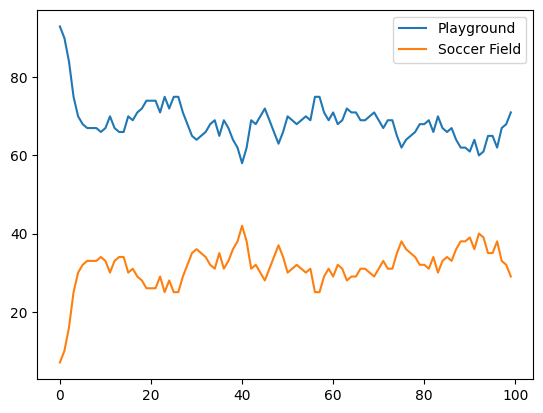

In [9]:
# let's plot the rounds
import matplotlib.pyplot as plt
import numpy as np
rounds = np.array(rounds)
plt.plot(rounds[:,0], label='Playground')
plt.plot(rounds[:,1], label='Soccer Field')
plt.legend()
plt.show()

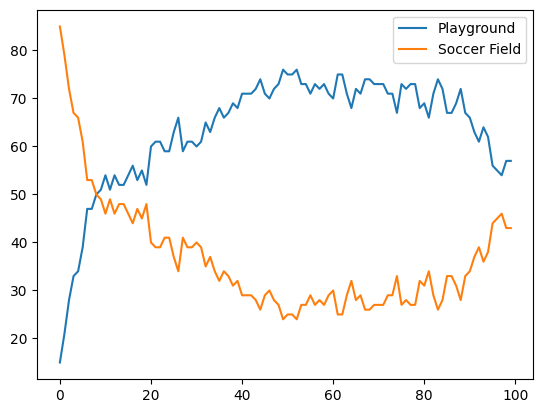

In [10]:
# let's start with everyone in the soccer field
state = (0, 100)
rounds = []
for i in range(100):
    state = one_round(state)
    rounds.append(state)

# plot it
rounds = np.array(rounds)
plt.plot(rounds[:,0], label='Playground')
plt.plot(rounds[:,1], label='Soccer Field')
plt.legend()
plt.show()

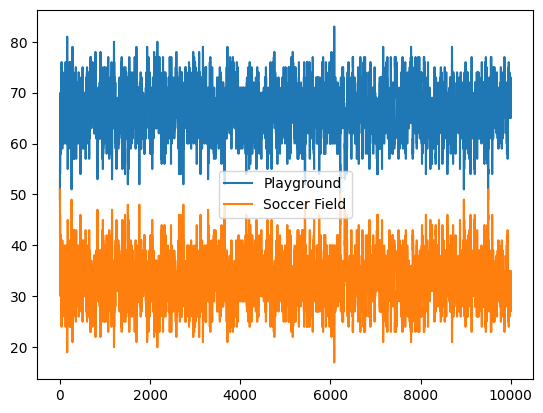

In [11]:
# how about we start at 50 50 and plot over 10_000 rounds - epochs
EPOCHS = 10_000
state = (50, 50)
rounds = []
for i in range(EPOCHS):
    state = one_round(state)
    rounds.append(state)

# plot it
rounds = np.array(rounds) # we supply list of number tuples to numpy array
plt.plot(rounds[:,0], label='Playground')
plt.plot(rounds[:,1], label='Soccer Field')
plt.legend()
plt.show()


In [12]:
# let's see what the average number of people in each state is
print(np.mean(rounds, axis=0))

[66.7099 33.2901]


## 14.2 Inference in Temporal Models 

This section outlines the core inference tasks involved in probabilistic reasoning over time within temporal models. These tasks are fundamental for interpreting and acting upon information in dynamic systems: 
- **Filtering (State Estimation):**  Involves computing the belief state P(Xt∣e1:t)P(X_t | e_{1:t})P(Xt​∣e1:t​), which is the posterior distribution over the most recent state given all evidence up to the current time. Filtering is crucial for a rational agent to maintain an updated understanding of the current state for making informed decisions. An example provided is computing the probability of rain today, given all prior umbrella observations. 
- **Prediction:**  Entails computing the posterior distribution over a future state, given all evidence up to the current point (P(Xt+k∣e1:t)P(X_{t+k} | e_{1:t})P(Xt+k​∣e1:t​) for some k>0k > 0k>0). Prediction helps in planning by allowing the assessment of potential future scenarios based on the evidence collected so far. 
- **Smoothing:**  Focuses on computing the posterior distribution over a past state, considering all evidence up to the present (P(Xk∣e1:t)P(X_k | e_{1:t})P(Xk​∣e1:t​) for 0≤k<t0 \leq k < t0≤k<t). Smoothing offers a refined estimate of past states by incorporating a broader evidence base than was available at the time, improving historical state estimates. 
- **Most Likely Explanation (MLE):**  Aims to determine the sequence of states most likely to have resulted in the observed sequence of evidence (argmaxx1:tP(x1:t∣e1:t)\text{argmax}_{x_{1:t}} P(x_{1:t} | e_{1:t})argmaxx1:t​​P(x1:t​∣e1:t​)). This task is vital in applications like speech recognition, where the goal is to identify the most likely sequence of words from sound inputs, or in reconstructing data transmitted over a noisy channel.

Additionally, the section touches on: 
- **Learning:**  Discusses how the transition and sensor models, if not predefined, can be learned from observation data. Learning can occur as a by-product of inference, where estimates of state transitions and the origins of sensor readings inform the models. This process can be iterative, utilizing algorithms like expectation–maximization (EM) or Bayesian updating based on evidence to refine model parameters.

The section sets the stage for presenting generic algorithms that address these inference tasks, applicable across different temporal model types. It also hints at subsequent discussions on model-specific improvements, underscoring the versatility and adaptability of temporal models in handling various dynamic scenarios.

### 14.2.1 Filtering and Prediction**  
- **Recursive Estimation for Filtering:**  Filtering is a process that updates the current state estimate based on new evidence without revisiting the entire history of percepts. This update, termed recursive estimation, uses a function fff to compute P(Xt+1∣e1:t+1)P(X_{t+1}|e_{1:t+1})P(Xt+1​∣e1:t+1​) from P(Xt∣e1:t)P(X_t|e_{1:t})P(Xt​∣e1:t​) and the new evidence et+1e_{t+1}et+1​. This process involves two steps: projecting the current state distribution forward and then updating it with new evidence. 
- **Two-Part Process in Filtering:**  The filtering calculation can be broken down into a prediction part (projecting the current state distribution forward) and an update part (adjusting this projection based on new evidence et+1e_{t+1}et+1​). The sensor model P(et+1∣Xt+1)P(e_{t+1}|X_{t+1})P(et+1​∣Xt+1​) is used for the update, and the prediction uses the transition model P(Xt+1∣Xt)P(X_{t+1}|X_t)P(Xt+1​∣Xt​) along with recursive application of previous state estimates. 
- **Recursive Filtering Implementation:**  The filtered estimate P(Xt∣e1:t)P(X_t|e_{1:t})P(Xt​∣e1:t​) acts as a "message" that is propagated forward, modified by each transition, and updated by each observation. This recursive formulation allows for constant time and space updates, essential for continuous tracking by finite agents. 
- **Example - Umbrella Scenario:**  The filtering process is demonstrated through the umbrella example, where the probability of rain (P(R2∣u1:2)P(R_2|u_{1:2})P(R2​∣u1:2​)) is computed across two days based on the appearance of an umbrella. This process shows how the probability of rain is updated as new evidence (umbrella sightings) is incorporated. 
- **Prediction Without New Evidence:**  Prediction is essentially filtering without the addition of new evidence, incorporating a one-step prediction within the filtering process itself. The state at t+k+1t+k+1t+k+1 can be predicted from a state at t+kt+kt+k using only the transition model, illustrating that prediction involves forward-projecting the state distribution without adjusting for new evidence. 
- **Convergence in Prediction:**  Over time, the predicted distribution may converge to a fixed point, representing the stationary distribution of the Markov process. This highlights the limitations in long-term predictions due to increasing uncertainty and the properties of the transition model. 
- **Computing Evidence Sequence Likelihood:**  The likelihood of the evidence sequence P(e1:t)P(e_{1:t})P(e1:t​) can also be computed using a forward recursion, useful for comparing different temporal models. This involves calculating a likelihood message and summing out the state variables to get the total likelihood of the evidence sequence. 
- **Numerical Challenges:**  The likelihood message tends to become numerically smaller over time, leading to potential underflow problems in practical implementations. Solutions to these numerical challenges are essential but not discussed in detail in this section.

This summary captures the essence of filtering and prediction in temporal models, highlighting the mechanisms for updating state estimates based on new evidence and predicting future states, with practical examples and the consideration of computational challenges.

### 14.2.2 Smoothing**  
- **Definition and Purpose:**  Smoothing refers to the process of determining the distribution over past states given all evidence up to the present, expressed as P(Xk∣e1:t)P(X_k | e_{1:t})P(Xk​∣e1:t​) for 0≤k<t0 \leq k < t0≤k<t. This process provides a more accurate estimation of past states by utilizing all available evidence. 
- **Recursive Message-Passing Approach:**  The smoothing computation is divided into two parts: evidence up to time kkk and evidence from time k+1k+1k+1 to ttt. This division facilitates a recursive approach that combines a "forward" message (f1:kf_{1:k}f1:k​) from filtering up to time kkk and a "backward" message (bk+1:tb_{k+1:t}bk+1:t​) that incorporates evidence from time k+1k+1k+1 to ttt. 
- **Backward Message Calculation:**  The backward message, bk+1:t=P(ek+1:t∣Xk)b_{k+1:t} = P(e_{k+1:t} | X_k)bk+1:t​=P(ek+1:t​∣Xk​), is computed through a recursive process that runs backward from ttt to kkk. This message captures the influence of future evidence on the estimation of past states. 
- **Combining Forward and Backward Messages:**  The smoothed estimate for a state at time kkk is obtained by combining the forward message (resulting from filtering) with the backward message through pointwise multiplication. This approach integrates information from both past and future evidence relative to time kkk. 
- **Initialization for Backward Phase:**  The backward phase is initialized with bt+1:t=1b_{t+1:t} = 1bt+1:t​=1, representing the certainty of observing an empty sequence of evidence from time t+1t+1t+1 to ttt, effectively setting the stage for backward recursion. 
- **Umbrella Example Application:**  In an example involving umbrella observations, the smoothing process is applied to calculate the probability of rain on a specific day, given umbrella observations on consecutive days. This demonstrates how the smoothed estimate adjusts based on the accumulation of evidence. 
- **Time Complexity:**  The time complexity for smoothing at a particular time step kkk is O(t)O(t)O(t), making it efficient for calculating smoothed estimates over time. For smoothing the entire sequence, a straightforward approach would result in O(t2)O(t^2)O(t2) complexity, but dynamic programming techniques can reduce this to O(t)O(t)O(t), maintaining efficiency. 
- **Forward-Backward Algorithm:**  A linear-time algorithm called the forward–backward algorithm efficiently computes smoothed estimates for the entire sequence by combining results from forward filtering with a backward recursion, demonstrating its utility as a computational backbone for handling sequences of noisy observations. 
- **Practical Considerations:**  The forward–backward algorithm faces challenges related to space complexity, especially with large state spaces and long sequences. Additionally, modifications are required for online settings where new observations continuously update the need for smoothed estimates for earlier time slices, such as in fixed-lag smoothing scenarios.

Smoothing effectively reconciles information from both past and future evidence to refine the estimation of past states in dynamic systems. Its computational framework, particularly the forward–backward algorithm, is crucial for a wide range of applications dealing with temporal data and noisy observations.

### Forward-Backward Algorithm

pseudo-code representation of the forward-backward algorithm based on the provided description. This algorithm computes posterior probabilities of states given a sequence of observations by utilizing forward and backward message passing:

```pseudo
function FORWARD-BACKWARD(ev, prior) returns a vector of probability distributions
    inputs: ev, a vector of evidence values for steps 1,...,t
            prior, the prior distribution on the initial state, P(X_0)
    local variables: fv, a vector of forward messages for steps 0,...,t
                     b, a representation of the backward message, initially all 1s
                     sv, a vector of smoothed estimates for steps 1,...,t

    // Initialize forward messages with the prior distribution
    fv[0] ← prior

    // Forward pass: Compute forward messages based on evidence
    for i = 1 to t do
        fv[i] ← FORWARD(fv[i-1], ev[i])

    // Initialize backward message to all 1s
    b ← all 1s vector

    // Backward pass: Compute smoothed estimates and update backward messages
    for i = t down to 1 do
        sv[i] ← NORMALIZE(fv[i] × b)
        b ← BACKWARD(b, ev[i])

    return sv
```



In this pseudo-code: 
- `FORWARD` and `BACKWARD` are functions that implement the forward and backward update steps defined by Equations (14.5) and (14.9), respectively. 
- `NORMALIZE` is a function that normalizes a vector so that its elements sum up to 1, converting the raw scores into probabilities. 
- `fv` stores the forward messages, which represent the belief state about the system's state at each time step before seeing the evidence at that step. 
- `b` represents the backward message used to integrate information from future observations. 
- `sv` stores the smoothed estimates, which are the posterior probabilities of the states at each time step, computed by combining information from both forward messages and backward messages. 
- The loop from 1 to ttt iterates through the evidence vector, updating the forward messages based on the current evidence and prior messages. 
- The backward pass iterates from ttt down to 1, updating the smoothed estimates and backward messages at each step.
- The algorithm returns the vector of smoothed estimates, providing a posterior distribution of states at each time step, given the entire sequence of observations.

### Forward-Backward Algorithm - Example

For a more concrete example, let's consider a simplified scenario involving a binary state space where the system can be in one of two states (`state_0` or `state_1`), and the evidence can also be binary (`evidence_true` or `evidence_false`). We will make the following assumptions: 
1. **Transition Model:**  The probability of transitioning from any state to itself is 0.7, and to the other state is 0.3. 
2. **Sensor Model:**  The probability of observing the correct evidence given the state is 0.8 (e.g., if it's `state_0`, there's an 80% chance of `evidence_true`), and the probability of incorrect evidence is 0.2. 
3. **Initial Prior:**  The system has an equal chance of starting in either state (`state_0` or `state_1`).

Based on these assumptions, we can implement the `FORWARD`, `BACKWARD`, and `NORMALIZE` functions in Python.

```python
def normalize(prob_dist):
    """Normalize a probability distribution."""
    total = sum(prob_dist)
    return [p / total for p in prob_dist]

def forward(prev_fv, ev_i):
    """Forward message computation based on transition and sensor models."""
    # Transition probabilities
    transition_matrix = [[0.7, 0.3], [0.3, 0.7]]
    # Sensor model probabilities
    sensor_model = {
        'evidence_true': [0.8, 0.2],  # Probability of observing true/false given the actual state
        'evidence_false': [0.2, 0.8]
    }
    
    # Apply transition model
    predicted = [sum(prev_fv[j] * transition_matrix[j][i] for j in range(2)) for i in range(2)]
    
    # Apply sensor model
    updated = [predicted[i] * sensor_model[ev_i][i] for i in range(2)]
    
    return normalize(updated)

def backward(b, ev_i):
    """Backward message computation based on transition and sensor models."""
    # Transition probabilities (same as in forward because of time symmetry)
    transition_matrix = [[0.7, 0.3], [0.3, 0.7]]
    # Sensor model probabilities (assuming backward step has same model as forward)
    sensor_model = {
        'evidence_true': [0.8, 0.2],
        'evidence_false': [0.2, 0.8]
    }
    
    # Apply sensor model first (reverse of forward step)
    sensor_applied = [b[i] * sensor_model[ev_i][i] for i in range(2)]
    
    # Apply transition model (reverse of forward, summing over future states)
    backward_updated = [sum(sensor_applied[j] * transition_matrix[i][j] for j in range(2)) for i in range(2)]
    
    return normalize(backward_updated)
```



To use these functions in the `forward_backward` function provided earlier, simply replace the placeholder calls to `FORWARD`, `BACKWARD`, and `NORMALIZE` with these implementations. This example assumes the evidence provided in the `ev` vector is either `'evidence_true'` or `'evidence_false'`, and it operates on a binary state space. The `normalize` function ensures that the probability distributions produced by the `FORWARD` and `BACKWARD` functions sum to 1.

This setup is a basic illustration. For a real-world application, you would need to adapt these functions based on the specifics of your transition and sensor models, as well as the structure of your state space and evidence.

### 14.2.3 Finding the Most Likely Sequence** 

The task of finding the most likely sequence of states given a sequence of observations (e.g., whether it was raining on each day based on umbrella observations) can be challenging, especially when considering all possible state sequences directly. Here's how this problem is approached and solved efficiently: 
- **Linear-Time Procedure vs. Joint Probabilities:**  A naive approach might involve using smoothing to find the most likely state at each time step independently. However, this method doesn't account for joint probabilities over the entire sequence, which are crucial for identifying the most likely overall sequence. 
- **Markov Property and Graph Representation:**  The efficient solution leverages the Markov property, viewing the sequence of states as paths through a graph with nodes representing possible states at each time step. The goal is to find the most likely path through this graph, considering both transition probabilities between states and the probabilities of observations at each state. 
- **Recursive Relationship for Paths:**  The most likely path to a state at time t+1t+1t+1 depends on the most likely path to a state at time ttt and the transition to t+1t+1t+1. This recursive relationship allows for a systematic approach to identify the most likely path through the state graph. 
- **Viterbi Algorithm:**  This linear-time algorithm computes the most likely sequence of states given the evidence. It uses a recursively computed message, similar to the forward message in filtering, but instead of summing probabilities, it maximizes them at each step to focus on the most likely paths. 
- The algorithm initializes with the prior distribution P(X0)P(X_0)P(X0​) and iteratively updates a message vector m1:tm_{1:t}m1:t​ to keep track of the most likely paths. 
- For each state, the algorithm also records the predecessor state that leads to the maximum probability path, allowing for the reconstruction of the most likely sequence by tracing these pointers backward from the final state. 
- **Handling Numerical Underflow:**  Numerical underflow is a concern due to the multiplication of probabilities over long sequences. Solutions include normalizing probabilities at each step or using log probabilities and addition to avoid underflow while maintaining the monotonic properties necessary for maximizing probabilities. 
- **Time and Space Complexity:**  The Viterbi algorithm has a time complexity linear in the length of the sequence ttt and a space requirement linear in ttt to store pointers for reconstructing the most likely sequence.

In summary, the Viterbi algorithm provides an efficient, linear-time method to compute the most likely sequence of states based on a series of observations. By leveraging the Markov property and a recursive approach to maximize the likelihood of paths through a state graph, the algorithm avoids the infeasibility of direct enumeration while accurately accounting for the joint probabilities of state sequences.


### Viterbi Algorithm in Python

The Viterbi algorithm is a dynamic programming algorithm used for finding the most likely sequence of hidden states—called the Viterbi path—that results in a sequence of observed events, especially in the context of Markov information sources and hidden Markov models (HMMs).

Below is an example implementation of the Viterbi algorithm in Python. This example assumes a simple scenario with two hidden states and binary observations, similar to the umbrella example discussed earlier: 
- Hidden states: `Rainy` and `Sunny` 
- Observations: `Umbrella` and `No Umbrella`
- Transition probabilities, emission probabilities, and initial state probabilities are hardcoded for simplicity.

```python
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
    # Run Viterbi for t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = max(V[t-1][prev_st]["prob"]*trans_p[prev_st][st] for prev_st in states)
            for prev_st in states:
                if V[t-1][prev_st]["prob"] * trans_p[prev_st][st] == max_tr_prob:
                    max_prob = max_tr_prob * emit_p[st][obs[t]]
                    V[t][st] = {"prob": max_prob, "prev": prev_st}
                    break
    for line in V:
        print(line)
    opt = []
    # The highest probability
    max_prob = max(value["prob"] for value in V[-1].values())
    previous = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] == max_prob:
            opt.append(st)
            previous = st
            break
    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]

    print('The steps of states are ' + ' '.join(opt) + ' with highest probability of %s' % max_prob)

# Example use case
states = ('Rainy', 'Sunny')
observations = ('Umbrella', 'Umbrella', 'No Umbrella', 'Umbrella', 'Umbrella')
start_probability = {'Rainy': 0.6, 'Sunny': 0.4}
transition_probability = {
   'Rainy': {'Rainy': 0.7, 'Sunny': 0.3},
   'Sunny': {'Rainy': 0.4, 'Sunny': 0.6},
}
emission_probability = {
   'Rainy': {'Umbrella': 0.9, 'No Umbrella': 0.1},
   'Sunny': {'Umbrella': 0.2, 'No Umbrella': 0.8},
}

viterbi(observations, states, start_probability, transition_probability, emission_probability)
```



This Python example defines the Viterbi algorithm function and applies it to a simple scenario involving weather states and umbrella observations. The algorithm calculates the most likely sequence of weather states based on the observations, utilizing hardcoded probabilities for state transitions and observations.

Remember, this is a simplified example. In real applications, especially in domains like speech recognition, bioinformatics, or natural language processing, the states, observations, and probabilities would be much more complex and typically derived from data.

## 14.3 Hidden Markov Models (HMMs) 

Hidden Markov Models (HMMs) represent a specific category of temporal probabilistic models that play a crucial role in applications requiring the analysis of sequential data. This summary highlights the key characteristics and advantages of HMMs: 
- **Definition and Structure:**  An HMM is defined by a discrete random variable that captures the state of a process over time. The state evolves according to a Markov process, meaning the future state depends only on the current state, not the history of states. This simplicity allows HMMs to model complex temporal behaviors through a sequence of observable events generated by these hidden states. 
- **Single State Variable:**  The core of an HMM is a single state variable that represents different states of the world at each point in time. For example, in the umbrella scenario, the state variable `Rain_t` indicates whether it is raining at time `t`. The simplicity of having a single state variable is a defining feature of HMMs, making them distinct and manageable for various applications. 
- **Combining Multiple State Variables:**  For more complex models involving multiple state variables, HMMs accommodate these by combining them into a single "megavariable." This megavariable encompasses all possible combinations of the individual state variables, effectively transforming a multi-variable model into a single-variable HMM. This approach maintains the Markov property and ensures the model's compatibility with the HMM framework. 
- **Evidence Variables:**  While HMMs restrict the state to be a single discrete variable, there are no such constraints on evidence variables. Evidence variables can be both discrete and continuous and are not limited in number. This flexibility allows HMMs to model a wide array of real-world phenomena where observations can come in various forms and from multiple sources. 
- **Matrix Implementation:**  The restricted structure of HMMs, with their single state variable and Markovian dynamics, lends itself to efficient implementations using matrices. This matrix formulation enables elegant and computationally efficient solutions for the basic algorithms, such as filtering, smoothing, and finding the most likely sequence of states. Matrix operations can leverage optimized linear algebra libraries, further enhancing performance. 
- **Applications:**  HMMs are widely used in fields such as speech recognition, where the sequence of spoken words (observable events) is generated by an underlying sequence of phonemes (hidden states); in bioinformatics for gene prediction and modeling protein sequences; and in natural language processing for tasks like part-of-speech tagging.

In summary, HMMs are a powerful tool for modeling and analyzing sequences where the underlying state of the system is not directly observable. By efficiently capturing the dynamics of hidden states through observable events, HMMs facilitate a broad range of applications in temporal probabilistic reasoning.

### 14.3.1 Simplified Matrix Algorithms for HMMs** 

Hidden Markov Models (HMMs) can be efficiently implemented using matrix operations, simplifying the computations for transition and sensor models, as well as for forward and backward messages. This approach leverages the structure of HMMs, where the state transition and evidence observation processes are modeled through matrices and vectors, allowing for elegant and computationally efficient solutions. 
- **Transition Model as a Matrix:**  The transition probabilities between states in an HMM can be represented by an S×SS \times SS×S matrix TTT, where SSS is the number of states. Each element TijT_{ij}Tij​ represents the probability of transitioning from state iii to state jjj. This matrix form allows for straightforward computation of state transitions across the entire model. 
- **Sensor Model as a Diagonal Matrix:**  The sensor model, which relates states to observations, is represented by a diagonal matrix OtO_tOt​ for each time step ttt. Each diagonal entry OtiiO_{t_{ii}}Otii​​ represents the probability of observing evidence ete_tet​ given the state iii, with non-diagonal entries set to zero. This matrix formulation simplifies the calculation of observation likelihoods. 
- **Matrix Operations for Forward and Backward Messages:**  Forward and backward messages, which are crucial for algorithms like filtering and smoothing, can be computed using matrix-vector operations. Specifically, the forward message update becomes f1:t+1=αOt+1T⊤f1:tf_{1:t+1} = \alpha O_{t+1} T^\top f_{1:t}f1:t+1​=αOt+1​T⊤f1:t​, and the backward message update is bk+1:t=TOk+1bk+2:tb_{k+1:t} = T O_{k+1} b_{k+2:t}bk+1:t​=TOk+1​bk+2:t​, where α\alphaα is a normalization constant ensuring probabilities sum to 1. 
- **Efficiency Gains:**  The matrix formulation leads to a significant efficiency gain, making the computational complexity of operations depend on the square of the number of states (O(S2t)O(S^2t)O(S2t)) rather than the length of the sequence. This efficiency is especially beneficial for models with a moderate number of states or when dealing with long sequences. 
- **Constant Space Smoothing:**  A variation on the forward-backward algorithm enables smoothing to be carried out in constant space, regardless of sequence length. This is achieved by manipulating the equations to propagate both forward and backward messages in a single pass, reducing storage requirements. 
- **Online Smoothing with Fixed Lag:**  The matrix formulation also facilitates efficient algorithms for online smoothing with a fixed lag. By maintaining a transformation matrix BBB that updates with each new observation, the algorithm can incrementally compute backward messages and smooth estimates in a manner that's independent of the lag's length.

This approach not only demonstrates the computational efficiency of using matrices in HMMs but also opens up possibilities for further algorithmic improvements. By representing the model's components in matrix form, one can leverage linear algebraic optimizations and potentially harness hardware acceleration (e.g., GPUs) for even faster computations.

### Fixed-Lag Smoothing in HMMs - Python example

To implement the fixed-lag smoothing algorithm in Python, we'll define several components based on the description provided. This implementation assumes a basic understanding of Hidden Markov Models (HMMs), including the transition matrix TTT, the sensor model represented as diagonal matrices OtO_tOt​, and the initial prior distribution. The `FORWARD` function, which updates the forward message fff, and the `NORMALIZE` function, which normalizes a distribution, need to be implemented specifically for the HMM in question.

This example also uses NumPy for matrix operations, given its efficiency and simplicity for such tasks.

First, ensure you have NumPy installed:

```bash
pip install numpy
```



Here's the Python code:

```python
import numpy as np

class FixedLagSmoothing:
    def __init__(self, hmm, d):
        self.hmm = hmm
        self.d = d
        self.t = 1
        self.f = hmm.PRIOR  # Initial forward message, typically the prior distribution
        self.B = np.eye(hmm.S)  # d-step backward transformation matrix, SxS identity matrix
        self.evidence_window = []  # Double-ended list of evidence

    def forward(self, f, observation):
        """Calculates the forward message for a given observation."""
        Ot = np.diag([self.hmm.sensor_model(state, observation) for state in self.hmm.states])
        return self.normalize(np.dot(np.dot(Ot, self.hmm.T.T), f))

    def normalize(self, distribution):
        """Normalizes a probability distribution."""
        total = np.sum(distribution)
        return distribution / total if total > 0 else distribution

    def update(self, et):
        """Updates the model with new evidence et and returns the smoothed distribution."""
        self.evidence_window.append(et)
        Ot = np.diag([self.hmm.sensor_model(state, et) for state in self.hmm.states])

        if self.t > self.d:
            # Update forward message
            self.f = self.forward(self.f, self.evidence_window[0])
            # Remove the oldest evidence
            self.evidence_window.pop(0)
            # Update B matrix for backward message transformation
            Ot_d = np.diag([self.hmm.sensor_model(state, self.evidence_window[0]) for state in self.hmm.states])
            self.B = np.dot(np.dot(np.linalg.inv(Ot_d), np.linalg.inv(self.hmm.T)), np.dot(self.B, Ot))
        else:
            self.B = np.dot(self.B, Ot)

        self.t += 1

        if self.t > self.d + 1:
            return self.normalize(np.dot(self.f, self.B).flatten())
        else:
            return None

# Example usage
if __name__ == "__main__":
    class SimpleHMM:
        """A simple example HMM to use with the FixedLagSmoothing algorithm."""
        def __init__(self):
            self.states = ['Rainy', 'Sunny']
            self.S = len(self.states)
            self.T = np.array([[0.7, 0.3], [0.3, 0.7]])  # Transition probabilities
            self.PRIOR = np.array([0.5, 0.5])  # Prior distribution

        def sensor_model(self, state, observation):
            """Returns the probability of observing given the state."""
            if state == 'Rainy':
                return 0.9 if observation == 'Umbrella' else 0.1
            else:
                return 0.2 if observation == 'Umbrella' else 0.8

    hmm = SimpleHMM()
    fls = FixedLagSmoothing(hmm, d=2)
    observations = ['Umbrella', 'No Umbrella', 'Umbrella', 'Umbrella', 'No Umbrella']
    
    for observation in observations:
        smoothed = fls.update(observation)
        if smoothed is not None:
            print(f"Smoothed distribution at time {fls.t - 1}: {smoothed}")
```



This code defines a `FixedLagSmoothing` class that implements the fixed-lag smoothing algorithm. It uses a simple HMM example (`SimpleHMM`) with two states (`Rainy` and `Sunny`) and binary observations (`Umbrella` and `No Umbrella`). The `update` method updates the model with new evidence and calculates the smoothed distribution over states at time t−dt-dt−d based on the current evidence window. The `forward` function calculates the forward message based on the current observation, and the `normalize` function ensures probability distributions sum to 1.

Note: This implementation is simplified and intended for educational purposes. In real applications, the HMM parameters and the sensor model would be more complex and likely derived from empirical data

### 14.3.2 Hidden Markov Model Example: Localization** 

This section illustrates the application of Hidden Markov Models (HMMs) to the problem of localization, enhancing the scenario from a simple vacuum world to include noisy sensors and random movements. It provides insights into how HMMs can be effectively utilized for estimating a robot's location in a grid world, despite uncertainties in sensor readings and movement. 
- **Model Adaptation for Noisy Conditions:**  The traditional localization problem is extended to account for sensor noise and random robot movements. The state variable XtX_tXt​ represents the robot's location on a discrete grid. Transitions between states (locations) are modeled to reflect equal likelihood of moving to any adjacent empty square, introducing randomness in movement. 
- **Transition Model:**  The transition probabilities are defined by a matrix TTT, where each entry TijT_{ij}Tij​ signifies the probability of moving from location iii to location jjj. This model assumes the robot is equally likely to end up in any neighboring square that is empty, providing a probabilistic approach to movement. 
- **Sensor Model with Noise:**  Incorporating sensor noise, the sensor model is adapted to reflect the probability of observing specific evidence given the robot's actual state. The sensor model considers the error rate ϵ\epsilonϵ and computes probabilities based on the discrepancy between true conditions and sensor readings. This model allows for a more realistic representation of environmental sensing. 
- **Uniform Initial Distribution:**  Without initial knowledge of the robot's starting location, a uniform distribution over all possible squares is assumed, reflecting equal probability of starting in any location. 
- **Matrix Operations:**  The HMM employs matrices to represent the transition model TTT and sensor models OtO_tOt​ for each time step, facilitating computations of the posterior distribution over locations. These matrices enable efficient calculation of where the robot is likely to be, given the sequence of observations. 
- **Evidence Integration Over Time:**  The algorithms for filtering, smoothing, and finding the most likely sequence (e.g., Viterbi algorithm) demonstrate the HMM's ability to integrate evidence over time. This integration helps counteract uncertainties from sensor noise and random movements, allowing for accurate location estimation and path determination even with relatively high error rates in sensor readings. 
- **Error Rates and Localization Accuracy:**  The model's effectiveness is illustrated by its ability to maintain low localization and path errors with sensor error rates up to 0.20. The ability to accurately track the robot's location degrades significantly when the error rate increases to 0.40, highlighting the balance between sensor accuracy and the model's ability to infer correct locations. 
- **Complexity and Scalability:**  Adding complexities, such as robot headings or dirt in each square, increases the state space and computational requirements. The example emphasizes the exponential growth in the number of states and the transition matrix size as more variables are included, pointing to the limitations of HMMs in handling highly complex environments with many state variables. 
- **Conclusion:**  HMMs offer a powerful framework for addressing localization problems in environments with noise and uncertainty. By probabilistically modeling transitions and observations, HMMs can effectively estimate a robot's location and movement path. However, the scalability of HMMs is challenged as the complexity of the model increases, indicating the need for more sophisticated approaches for highly detailed environments.

<img src="https://raw.githubusercontent.com/ValRCS/RBS_PBM773_Introduction_to_AI/main/img/ch14_probilistic_reasoning_over_time/DALL%C2%B7E%202024-02-21%2015.52.27%20-%20Illustration%20of%20a%20robot%20vacuum%20navigating%20a%20chaotic%20environment%20filled%20with%20noise%2C%20dirt%2C%20and%20various%20forms%20of%20interference.%20The%20scene%20is%20inside%20a%20hous.webp" width="400">

## 14.4 Kalman Filters 

Kalman Filters are a powerful tool for estimating the state of a dynamic system with continuous variables from noisy observations over time. This method is particularly useful in situations where you need to track or predict the position and velocity of a moving object based on incomplete or imprecise data. Here are the key points about Kalman Filters: 
- **Filtering in Practice:**  Kalman Filters are applied in scenarios where it's necessary to estimate continuous state variables from noisy observations, such as tracking a bird's flight, monitoring radar signals, or reconstructing planetary motions. These examples illustrate the broad applicability of filtering in estimating dynamic states. 
- **Continuous Variables:**  Unlike Hidden Markov Models which deal with discrete variables, Kalman Filters are designed for systems with continuous state variables. The method is named after Rudolf Kalman, one of its inventors. 
- **Linear-Gaussian Model:**  Kalman Filters assume that transitions between states are linear with added Gaussian noise. This assumption simplifies the representation of transition and sensor models using linear equations and Gaussian distributions. For example, the position of an object at a future time is a linear function of its current position and velocity, with some Gaussian noise to account for uncertainties like wind variations. 
- **State Representation:**  A typical use case might involve tracking an object's position and velocity, represented by six continuous variables (Xt,Yt,ZtX_t, Y_t, Z_tXt​,Yt​,Zt​ for position and X˙t,Y˙t,Z˙t\dot{X}_t, \dot{Y}_t, \dot{Z}_tX˙t​,Y˙t​,Z˙t​ for velocity). The transition model for such a system would involve linear equations incorporating these variables, with Gaussian noise representing environmental uncertainties. 
- **Bayesian Network Structure:**  The Bayesian network for a system under observation with Kalman Filters outlines the dependencies between position and velocity variables across time steps. This structure facilitates the application of linear-Gaussian models for state estimation. 
- **Properties of Gaussian Distributions:**  Kalman Filtering leverages properties of Gaussian distributions, which are defined by their mean (μ\muμ) and covariance matrix (Σ\SigmaΣ). These properties are crucial for understanding the behavior of the system being modeled and for implementing the filter correctly. 
- **Applications:**  Beyond tracking and navigation, Kalman Filters have wide-ranging applications in fields like robotics, aerospace, finance, and weather forecasting. Their ability to efficiently handle uncertainty and noise in dynamic systems makes them invaluable for real-time state estimation and prediction.

Kalman Filters represent a sophisticated approach to the problem of filtering in systems with continuous variables, offering a principled and mathematically sound method for dealing with the uncertainty inherent in dynamic environments. Their reliance on the linear-Gaussian assumption allows for a relatively straightforward implementation while covering a wide range of practical scenarios.

### 14.4.1 Updating Gaussian Distributions** 

This section delves into the property of linear-Gaussian models that makes them particularly well-suited for Kalman filtering: their ability to remain within the linear-Gaussian family even after Bayesian updating. This property ensures that when working with Gaussian distributions in a temporal probability model, the operations of prediction and updating can be performed in a way that the resulting distributions are still Gaussian. Here are the crucial points regarding this updating process: 
- **Gaussian Distributions and Bayesian Updating:**  In the context of Kalman filtering, if both the initial state distribution and the transition model are Gaussian (and the transition model is linear with respect to its arguments), then the predicted state distribution remains Gaussian. This property is critical for maintaining computational tractability over time. 
- **Prediction Step:**  Given a Gaussian current distribution P(Xt∣e1:t)P(X_t | e_{1:t})P(Xt​∣e1:t​), and assuming a linear-Gaussian transition model P(Xt+1∣Xt)P(X_{t+1} | X_t)P(Xt+1​∣Xt​), the one-step prediction for the next state's distribution, represented by P(Xt+1∣e1:t)P(X_{t+1} | e_{1:t})P(Xt+1​∣e1:t​), is also Gaussian. This prediction integrates over all possible current states XtX_tXt​, weighted by their probabilities, to compute the distribution for Xt+1X_{t+1}Xt+1​. 
- **Update Step:**  When the predicted distribution P(Xt+1∣e1:t)P(X_{t+1} | e_{1:t})P(Xt+1​∣e1:t​) is Gaussian and the sensor model P(et+1∣Xt+1)P(e_{t+1} | X_{t+1})P(et+1​∣Xt+1​) is linear-Gaussian, the process of incorporating new evidence et+1e_{t+1}et+1​ to update the distribution results in a posterior distribution P(Xt+1∣e1:t+1)P(X_{t+1} | e_{1:t+1})P(Xt+1​∣e1:t+1​) that is also Gaussian. This update step combines the predicted distribution with the likelihood of the new evidence to refine the estimate of the state. 
- **Forward Operator in Kalman Filtering:**  In Kalman filtering, the forward message, represented as a Gaussian distribution with mean μt\mu_tμt​ and covariance Σt\Sigma_tΣt​, is transformed into a new Gaussian distribution with mean μt+1\mu_{t+1}μt+1​ and covariance Σt+1\Sigma_{t+1}Σt+1​ through the forward operator. This process starts with a Gaussian prior and iteratively applies linear-Gaussian models to produce Gaussian state distributions for all time steps. 
- **Importance of Gaussian Closure:**  The fact that linear-Gaussian models remain closed under Bayesian updating (i.e., they produce Gaussian distributions at every step) is significant because it allows for efficient and exact filtering. In contrast, filtering in models with non-Gaussian or non-linear characteristics typically results in increasingly complex distributions that are difficult to represent and compute over time. 
- **Computational Efficiency:**  The preservation of Gaussian distributions through the filtering process means that state estimates can be efficiently updated and predicted using only the means and covariances of the distributions. This efficiency is a key advantage of Kalman filters, especially in real-time applications where computational resources may be limited.

In summary, the property of linear-Gaussian models to remain Gaussian after Bayesian updating underpins the practical utility of Kalman filters for continuous state estimation. This characteristic enables precise and computationally efficient tracking of dynamic systems over time.

### 14.4.2 A Simple One-Dimensional Example of Kalman Filtering** 

This section breaks down the essence of Kalman filtering by demonstrating how Gaussian distributions are updated through a simple one-dimensional example. The focus is on a univariate case to illustrate the core principles without the complexity of multivariate scenarios. Here are the main points: 
- **Kalman Filtering with Gaussian Distributions:**  The fundamental operation in Kalman filtering involves mapping a Gaussian distribution into another Gaussian distribution by computing a new mean and covariance based on the previous ones. This process is pivotal because it maintains the Gaussian nature of the distribution after each update, crucial for the Kalman filter's effectiveness. 
- **Random Walk Example:**  Consider a system like the “consumer confidence” index modeled as undergoing a random walk with Gaussian-distributed changes and measured by a survey introducing additional Gaussian noise. The initial state distribution is Gaussian, and both the transition and sensor models add Gaussian noise, reflecting changes in state and measurement errors, respectively. 
- **Prediction Step:**  The one-step predicted distribution is derived by integrating over all possible current states, considering the transition model's Gaussian noise. This results in a predicted distribution that is also Gaussian, with an updated variance that includes both the original variance and the variance from the transition model. 
- **Update Step:**  Incorporating an observation involves conditioning the predicted distribution on this new evidence. The observation model adds its Gaussian noise to the mix. By combining these effects and completing the square, the posterior distribution after observing new evidence is also Gaussian. 
- **Updating Mean and Variance:**  The updated mean and variance are calculated by weighting the new observation against the previous state estimate, considering the reliability of both. This weighted mean reflects a balance between the new data and the existing estimate, while the updated variance indicates the certainty of the new estimate. 
- **Properties of the Update Equations:**  The equations for updating the mean and variance illustrate several important properties:
- The new mean is a weighted average of the observation and the prior mean, adjusted based on the relative uncertainty of the observation and the prior estimate.
- The update of the variance is independent of the observation itself, allowing for pre-computation of the variance sequence over time.
- The variance sequence quickly converges to a fixed value, simplifying calculations in subsequent updates. 
- **Interpretation and Convergence:**  The process of updating the mean can be seen as balancing the information from the new observation against the prior belief, with the variance update reflecting the evolving certainty of the state estimate. The convergence of the variance sequence to a stable value is a notable feature, indicating that the system's uncertainty reaches an equilibrium.

This simple one-dimensional example illustrates the core mechanics of Kalman filtering, highlighting how Gaussian distributions are updated through prediction and observation steps to refine estimates of a system's state over time. The mathematical properties of Gaussian distributions play a critical role in ensuring the efficacy and computational efficiency of the Kalman filter in continuous state estimation.


### 14.4.3 The General Case of Kalman Filtering** 

In the general case, Kalman filtering extends its utility to multivariate systems, maintaining the Gaussian nature of distributions through linear transformations and additive Gaussian noise. This section underscores the versatility and mathematical foundation that enable Kalman filtering to be applied to complex, multidimensional scenarios. Here are the essential concepts: 
- **Multivariate Gaussian Distributions:**  The foundation of Kalman filtering in the general case rests on the property of multivariate Gaussian distributions, which are defined by a mean vector μ\muμ, a covariance matrix Σ\SigmaΣ, and their quadratic form in the exponent. This characteristic ensures that the updating process preserves the Gaussian distribution, allowing for analytical tractability. 
- **Linear-Gaussian Transition and Sensor Models:**  For Kalman filtering to apply, both the transition model (describing system evolution) and the sensor model (relating state variables to observations) must be linear with respect to their arguments and include additive Gaussian noise. The transition model is represented as P(xt+1∣xt)=N(xt+1;Fxt,Σx)P(x_{t+1}|x_t) = N(x_{t+1}; Fx_t, \Sigma_x)P(xt+1​∣xt​)=N(xt+1​;Fxt​,Σx​), and the sensor model as P(zt∣xt)=N(zt;Hxt,Σz)P(z_t|x_t) = N(z_t; Hx_t, \Sigma_z)P(zt​∣xt​)=N(zt​;Hxt​,Σz​), where FFF and HHH are matrices defining the linear relationships, and Σx\Sigma_xΣx​ and Σz\Sigma_zΣz​ are the noise covariance matrices. 
- **Update Equations for Mean and Covariance:**  The update process involves computing the new mean μt+1\mu_{t+1}μt+1​ and covariance Σt+1\Sigma_{t+1}Σt+1​ based on the previous state's mean μt\mu_tμt​, covariance Σt\Sigma_tΣt​, and the new observation zt+1z_{t+1}zt+1​. The Kalman gain matrix Kt+1K_{t+1}Kt+1​ plays a crucial role in determining the weight given to the new observation relative to the prediction, adjusting the state estimate accordingly. 
- **Kalman Gain Matrix:**  The Kalman gain Kt+1K_{t+1}Kt+1​ is a measure of the reliability of the new observation compared to the predicted state. It influences how much the predicted observation's error adjusts the state estimate, balancing the contribution of the new data against the existing belief about the system's state. 
- **Offline Computation of Variance Sequence:**  A significant advantage of Kalman filtering is that the variance update is independent of the observations, allowing for pre-computation of the sequence of covariance and Kalman gain matrices. This property simplifies the calculations required during real-time tracking. 
- **Application Example:**  An example involving tracking an object's motion on the X-Y plane demonstrates Kalman filtering's effectiveness. The state variables include position and velocity components, and the filtering process accurately tracks the object's trajectory while estimating the uncertainties (covariances) associated with the position. 
- **Smoothing with Linear-Gaussian Models:**  Beyond filtering, Kalman filtering can be extended to smoothing, which refines the estimates of past states based on all observed data. Smoothing significantly reduces the variance in position estimates, leading to a smoother estimated trajectory.

Kalman filtering in the general case showcases the power of linear-Gaussian models to provide precise, real-time estimates of system states in multidimensional spaces. By leveraging the properties of Gaussian distributions and linear transformations, Kalman filters offer a robust framework for state estimation and tracking in a wide range of applications.


### 14.4.4 Applicability of Kalman Filtering** 

Kalman filtering is a versatile technique widely applied in various domains for tracking and estimating the state of dynamic systems. This section highlights the broad range of applications and considerations for the effective use of Kalman filters, along with extensions to address non-linear systems. 
- **Wide Range of Applications:**  
- **Classical Applications:**  Initially developed for radar tracking of aircraft and missiles, Kalman filtering has found applications in acoustic tracking of submarines, ground vehicles, and visual tracking of vehicles and people. 
- **Scientific Research:**  It's used in reconstructing particle trajectories from bubble-chamber photographs and studying ocean currents from satellite surface measurements. 
- **Industrial and Environmental Systems:**  Kalman filters are applied to monitor and control processes in pulp mills, chemical plants, nuclear reactors, ecosystems, and even to model national economies. 
- **Core Assumptions:**  The fundamental assumption behind Kalman filtering is the linear-Gaussian nature of transition and sensor models. These strong assumptions may not always hold, limiting the applicability or accuracy of the model in systems that exhibit significant non-linear behavior. 
- **Extended Kalman Filter (EKF):**  To address non-linearities, the Extended Kalman Filter approximates non-linear systems as locally linear at the current state's mean. EKF has been successful in smooth, well-behaved systems, providing a Gaussian approximation of the state distribution that aligns closely with the true posterior distribution. 
- **Challenges with Non-Linear Systems:**  Significant non-linearity within the vicinity of the current state mean can lead to inaccuracies. For example, predicting a bird's motion as it approaches a tree trunk illustrates how a Gaussian prediction may not capture potential evasive actions, which are highly non-linear responses. 
- **Switching Kalman Filter:**  To better model systems with complex behaviors, such as evasive maneuvers, the switching Kalman filter employs multiple parallel Kalman filters, each representing a different system model (e.g., straight flight, sharp left turn). The overall prediction is a weighted sum of these filters' outputs, with weights adjusted based on current data fit. This approach is a subset of the more general dynamic Bayesian network model, incorporating discrete state variables to represent different maneuvers. 
- **General Dynamic Bayesian Networks:**  The switching Kalman filter concept extends into dynamic Bayesian networks by adding discrete variables that capture different modes of system behavior, offering a more flexible and expressive framework for modeling complex dynamics.

Kalman filtering and its extensions demonstrate the power of probabilistic modeling in understanding and predicting the behavior of dynamic systems. While the standard Kalman filter offers a robust framework for linear-Gaussian systems, its extensions, like the EKF and switching Kalman filter, provide valuable tools for dealing with non-linearities and complex behaviors. These methods highlight the importance of selecting appropriate models that align with the system's characteristics to ensure accurate state estimation and tracking.

### 14.4.3 Kalman Filter in Python

#### TODO: Add Kalman Filter in Python example

## 14.5 Dynamic Bayesian Networks (DBNs)** 

Dynamic Bayesian Networks (DBNs) are a powerful extension of Bayesian networks that model temporal dynamics in systems. They encapsulate the evolution of states over time, incorporating both discrete and continuous variables to represent complex real-world processes. Here are the key points about DBNs: 
- **Generalization of Temporal Models:**  DBNs generalize the concept of temporal probability models, allowing for the representation of systems where variables and their dependencies can span across time slices. They can model any number of state variables (XtX_tXt​) and evidence variables (EtE_tEt​) across different time steps. 
- **First-order Markov Process Assumption:**  DBNs typically assume a first-order Markov process, where each variable's state depends only on its own previous state or the state of other variables in the immediately preceding time slice. This assumption simplifies the representation while still capturing the essential dynamics of the system. 
- **Representation of HMMs and Beyond:**  While every Hidden Markov Model (HMM) can be seen as a DBN with a single state and evidence variable, DBNs offer a more nuanced representation by breaking down complex systems into multiple interacting variables. This decomposition leverages the sparsity in temporal models to manage complexity efficiently. 
- **Efficiency through Decomposition:**  DBNs can significantly reduce the complexity of representing temporal processes. Instead of requiring a transition matrix size that grows exponentially with the number of variables (as in HMMs), DBNs can represent transitions with a complexity that is linear in the number of variables, thanks to their ability to exploit the sparseness in inter-variable dependencies. 
- **Flexibility in Modeling:**  DBNs can represent a wide range of models, including those with linear-Gaussian conditional distributions for continuous variables (similar to Kalman Filters) and those involving complex interactions among discrete variables. This flexibility makes DBNs suitable for modeling diverse real-world applications, from ecosystem dynamics to economic systems. 
- **Modeling Arbitrary Distributions:**  Unlike Kalman Filters, which are limited to multivariate Gaussian distributions, DBNs can model arbitrary distributions across their variables. This capability is crucial for accurately representing systems where states may not conform to a single "Gaussian bump," allowing for the modeling of discrete events, nonlinearities, and multimodal distributions. 
- **Real-world Applications:**  The ability of DBNs to incorporate both discrete and continuous variables makes them particularly useful for modeling real-world phenomena, where systems often exhibit behaviors that cannot be captured by a single Gaussian distribution. Examples include tracking the location of objects (like keys) that may occupy distinctly separate and meaningful places, highlighting the necessity of modeling flexibility.

DBNs offer a robust framework for understanding and predicting the behavior of dynamic systems over time. By efficiently representing the temporal evolution of states and accommodating both discrete and continuous variables, DBNs provide a powerful tool for capturing the complexities of real-world processes.


### 14.5.1 Constructing Dynamic Bayesian Networks (DBNs)** 

Constructing DBNs involves defining the structure and parameters that capture the dynamics of a system over time. This process includes specifying the prior distribution of state variables, the transition model for state evolution, and the sensor model for observations. Here’s a detailed look at these components: 
- **Prior Distribution:**  The starting point of a DBN is the prior distribution P(X0)P(X_0)P(X0​) over the initial state variables. This distribution sets the initial condition or belief about the system's state before any observations are made. 
- **Transition Model:**  The transition model P(Xt+1∣Xt)P(X_{t+1} | X_t)P(Xt+1​∣Xt​) specifies how the state variables evolve over time. It captures the dynamics of the system, defining how the current state influences the next state. In a time-homogeneous DBN, the transition model is consistent across all time steps, simplifying its specification to just the first time slice. 
- **Sensor Model:**  The sensor model P(Et∣Xt)P(E_t | X_t)P(Et​∣Xt​) describes how observations (evidence variables) are generated from the state variables. It accounts for potential noise in measurements, allowing the DBN to infer the underlying state from imperfect observations. 
- **Topology and Time-Homogeneity:**  DBNs require a specification of how variables are connected across time slices and between state and evidence variables within each slice. The assumption of time-homogeneity—that the models for transitions and observations do not change over time—facilitates the construction of DBNs by replicating the specified relationships from slice to slice.

**Example: Battery-Powered Robot** 
A practical example involves a robot moving in the X-Y plane, monitored through position measurements and battery level estimates. The state variables include position (XtX_tXt​, YtY_tYt​) and velocity (X˙t\dot{X}_tX˙t​, Y˙t\dot{Y}_tY˙t​), along with battery level (BatterytBattery_tBatteryt​) and a sensor measurement for the battery level (BMetertBMeter_tBMetert​). The transition model captures dependencies such as the influence of velocity on next position and the impact of movement on battery level. The sensor model for BMetertBMeter_tBMetert​ incorporates potential measurement noise and sensor failures.

**Sensor Failures and Models:**  
- **Transient Failures:**  These occasional failures, like a battery meter temporarily reading zero, challenge simple Gaussian error models. Incorporating a transient failure model, which allows for occasional nonsensical readings, helps the system to maintain robust estimates despite sensor inaccuracies. 
- **Persistent Failures:**  For long-term sensor failures, a persistent failure model augments the system's state with additional variables (e.g., BMBrokenBMBrokenBMBroken) to account for the sensor's reliability over time. This model adjusts beliefs about system states based on the likelihood of sensor failure, enabling more accurate state estimation under varying sensor conditions.

Constructing DBNs thus involves a careful consideration of the system's dynamics, measurement processes, and potential anomalies in observations. By modularly specifying the prior, transition, and sensor models, and by incorporating mechanisms to handle sensor inaccuracies and failures, DBNs provide a flexible and powerful framework for modeling complex temporal systems.

### 14.5.2 Exact Inference in Dynamic Bayesian Networks (DBNs)** 

Exact inference in DBNs is the process of calculating the posterior distribution of state variables given a sequence of observations. This process, crucial for understanding the state of a system over time, faces challenges due to the complexity and the growing size of the network as more observations are made. Here's a summary of the key points regarding exact inference in DBNs: 
- **Unrolling DBNs:**  The fundamental approach to inference in DBNs involves "unrolling" the network to cover the time span of interest. This technique transforms a DBN into a standard Bayesian network for a finite sequence of observations, enabling the application of conventional inference algorithms designed for static networks. 
- **Efficiency Concerns:**  Directly unrolling a DBN for inference with a long sequence of observations becomes inefficient over time. The space required for the unrolled network grows linearly with the number of observations, and if inference is performed anew for each observation, the computational cost also increases linearly. 
- **Recursive Filtering for Efficiency:**  To achieve constant time and space efficiency per update, recursive filtering techniques are employed. By summing out variables of the previous time step, the distribution for the current time step is obtained, mimicking the operation of the variable elimination algorithm when variables are processed in temporal order. This approach maintains a manageable computational load by keeping only a limited number of slices in memory at any one time. 
- **Challenges with State Variables:**  Despite the recursive approach, the complexity of updating remains a significant challenge, often exponential in the number of state variables. This complexity arises because factors (or conditional probability tables) in the computation can grow to include all state variables, making exact inference computationally infeasible for networks with a large number of variables. 
- **Infeasibility for Large Networks:**  The exponential complexity in the number of state variables means that exact inference in DBNs, while theoretically possible, is practically infeasible for complex temporal processes with many variables. The posterior joint distribution conditioned on observations cannot be efficiently factorized due to this complexity. 
- **Approximate Methods as a Solution:**  Given the intractability of exact inference for large or complex DBNs, approximate methods become necessary. These methods, such as particle filtering or variational approaches, provide ways to estimate the state of a system without the computational burden of exact inference.

In summary, while DBNs offer a powerful framework for modeling temporal dynamics, the practical application of exact inference methods is limited by computational challenges. The growth of the network with each new observation and the exponential complexity related to the number of state variables necessitate the use of approximate inference methods to analyze and make predictions based on DBN models in real-world applications.


### 14.5.3 Approximate Inference in Dynamic Bayesian Networks (DBNs)** 

Approximate inference in DBNs is essential for dealing with complex temporal models when exact inference becomes computationally infeasible. This summary highlights key methods and innovations for conducting approximate inference, particularly focusing on particle filtering and its adaptations to address challenges in DBNs. 
- **Adapting Likelihood Weighting:**  Likelihood weighting, one of the basic approximation algorithms, is adapted to the DBN context by processing samples sequentially through the network. This method, called Sequential Importance Sampling (SIS), uses samples as an approximate representation of the current state distribution, aiming to maintain efficiency as the network grows with each time step. 
- **Challenges with Standard SIS:**  A significant issue with standard SIS in DBNs is that the sample set may become increasingly irrelevant to the observed evidence over time. This irrelevance leads to a situation where almost all samples have very low weights, requiring exponentially more samples to maintain accuracy, which is impractical in real-time applications. 
- **Particle Filtering as a Solution:**  Particle filtering addresses the shortcomings of standard SIS by focusing sample generation on high-probability regions of the state space. It involves propagating samples through the transition model, weighting them by the evidence, and then resampling to focus the computational resources on the most probable states. This process helps maintain a good approximation to the true posterior distribution with a constant number of samples. 
- **Sequential Importance Sampling with Resampling (SISR):**  The core of particle filtering, also known as Sequential Importance Sampling with Resampling (SISR), ensures that the sample population remains concentrated on likely states. By resampling according to the weights assigned by the evidence, particle filtering effectively reallocates computational resources to where they are most needed. 
- **Consistency and Efficiency of Particle Filtering:**  Particle filtering is consistent, meaning it provides correct probabilities as the number of samples tends to infinity. It's efficient for many practical cases, maintaining a good approximation to the true posterior using a fixed number of samples. This efficiency is demonstrated in applications ranging from localization problems to scientific and engineering tasks. 
- **Limitations and Solutions for Particle Filtering:**  Particle filtering faces challenges, particularly in scenarios with deterministic transitions or where conditional independence assumptions do not hold. One notable problem is the collapse of sample diversity, where all particles converge on a single, incorrect hypothesis due to deterministic models. 
- **Rao-Blackwellized Particle Filtering (RBPF):**  To address certain limitations, Rao-Blackwellized Particle Filtering combines particle filtering with exact inference for a subset of variables. By exploiting conditional independence properties, RBPF can significantly improve accuracy and efficiency, as demonstrated in tasks like simultaneous localization and mapping (SLAM).

In summary, approximate inference in DBNs, particularly through particle filtering and its variants, offers a practical and effective means of dealing with the complexity and uncertainty inherent in temporal models. By focusing computational efforts on the most probable states and incorporating exact inference where possible, these methods enable the handling of complex dynamic systems in a wide range of applications.

## Chapter Summary 

This chapter delves into the intricacies of probabilistic temporal processes, providing insights into how the evolving state of the world can be modeled and understood through probabilistic frameworks. Here's a concise summary of the chapter's key takeaways: 
- **Temporal State Representation:**  The chapter begins by discussing the representation of the world's changing state through a series of random variables, each corresponding to a specific point in time. This approach allows for the modeling of temporal dynamics in a structured manner. 
- **Markov Property and Time-Homogeneity:**  A significant emphasis is placed on designing representations that adhere to the Markov property, where the future state is independent of the past given the present state. This assumption, coupled with the concept of time-homogeneity (the idea that the process's dynamics do not change over time), simplifies the construction and analysis of temporal models. 
- **Transition and Sensor Models:**  Central to temporal probability models are the transition model, which outlines how the state evolves over time, and the sensor model, which describes how observations relate to the underlying state variables. These models are foundational for understanding and predicting changes in the system. 
- **Inference Tasks:**  The chapter outlines the primary inference tasks for temporal models: filtering (estimating the current state), prediction (forecasting future states), smoothing (refining past state estimates), and identifying the most likely sequence of events. It introduces recursive algorithms that provide efficient solutions to these tasks, with runtime linear in the sequence length. 
- **Temporal Models Explored:**  The discussion further narrows down to three specific families of temporal models: Hidden Markov Models (HMMs), Kalman Filters, and Dynamic Bayesian Networks (DBNs). DBNs are highlighted for their inclusivity, encompassing both HMMs and Kalman Filters as special cases under a broader framework. 
- **Challenges in Exact Inference:**  The chapter acknowledges the computational challenges associated with exact inference in models with numerous state variables. Except under certain conditions (as with Kalman Filters), exact inference becomes computationally prohibitive, necessitating the exploration of approximate methods. 
- **Particle Filtering and Approximations:**  As a solution to the intractability of exact inference, the chapter introduces particle filtering and its variants as powerful approximation algorithms. These methods are celebrated for their practical effectiveness across a wide range of applications, offering a viable approach to dealing with complex dynamic systems.

Overall, this chapter provides a comprehensive overview of probabilistic modeling for temporal processes, equipping readers with the knowledge to represent, analyze, and make predictions about dynamic systems in a probabilistic context.

## Historical and Bibliographical Notes

- **C. F. Gauss (1809):**  Developed the deterministic least-squares algorithm for orbit estimation from astronomical observations, laying foundational work in state estimation. 
- **A. A. Markov (1913):**  Introduced the Markov assumption, analyzing stochastic processes and estimating a first-order Markov chain using text from "Eugene Onegin". 
- **World War II Contributions:**  
- **Norbert Wiener (1942):**  Worked on continuous-time process filtering. 
- **Andrey Kolmogorov (1941):**  Developed discrete-time process filtering.
- Both contributed to significant technological advancements in signal processing and filtering. 
- **State-Space Modeling:**  
- **Peter Swerling (1959) and Rudolf Kalman (1960):**  Simplified stochastic process modeling through direct state-space representation. Kalman introduced the Kalman filter for linear systems with Gaussian noise. 
- **Thorvold Thiele (1880) and Ruslan Stratonovich (1959):**  Had earlier obtained results similar to Kalman's. 
- **Smoothing Techniques:**  
- **Rauch et al. (1965):**  Derived key results on smoothing, leading to the development of the Rauch–Tung–Striebel smoother. 
- **Hidden Markov Models (HMMs):**  
- **Baum and Petrie (1966):**  Developed the HMM and the associated algorithms for inference and learning. 
- **Andrew Viterbi (1967):**  Introduced the Viterbi algorithm for finding the most likely sequence of hidden states. 
- **Dynamic Bayesian Networks (DBNs):**  
- **Introduced in AI by Dean and Kanazawa (1989), Nicholson and Brady (1992), and Kjaerulff (1992):**  These works extended Bayesian networks to accommodate temporal dynamics. 
- **Murphy (2002):**  Provided a comprehensive analysis of DBNs. 
- **Particle Filtering:** 
- Developed in the control theory community and reinvented in statistics, control theory, AI, and computer vision under various names. 
- **Important for tracking complex motion patterns and has applications in numerous fields including finance and robotics.** 
- **Rao-Blackwellized Particle Filtering (RBPF):**  Combines particle filtering with exact inference for subsets of variables, effectively addressing challenges in simultaneous localization and mapping (SLAM) and other applications. 
- **Sequential Monte Carlo (SMC) Methods:**  Include a range of algorithms for filtering, with particle filtering being a prominent example, supported by theoretical results ensuring bounded error under certain conditions.